In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_partition_array(arr,rank):
    length=np.size(arr[0])-rank
    return np.argpartition(arr,length,axis=-1)[:,length:]

In [3]:
def calculate_accuracy(ref,check):
    same=0
    for i in range(0,np.size(ref)):
        if ref[i] in check[i]:
            same=same+1
    accuracy=same/np.size(ref)
    return accuracy*100

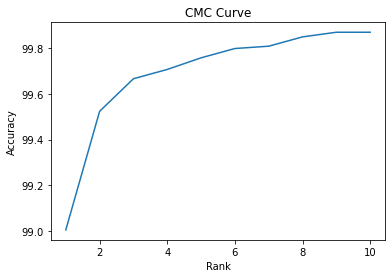

In [11]:
if __name__ == "__main__":
    score=np.load("score.npy")
    label=np.load("label.npy")
    rank=[]
    accuracy=[]
    for i in range (1,11):
        part_score=create_partition_array(score,i)
        part_label=np.argmax(label, axis=-1)
        rank.append(i)
        accuracy.append(calculate_accuracy(part_label,part_score))
    plt.plot(rank,accuracy)
    plt.xlabel("Rank")
    plt.ylabel("Accuracy")
    plt.title("CMC Curve")    